# Students Scores Prediction
Predicting the percentage of an student based on the no. of study hours using a simple linear regressor.

### Data Importing
First, we need to import our data to our environment using read_csv() method from pandas library.

In [1]:
# import pandas under alias pd
import pandas as pd

# read our csv_file in 'data' using read_csv(), passing it the path of our file : data
student_scores = pd.read_csv('https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv')
print('Data imported successfully!')

Data imported successfully!


### Data Exploration
We need to know more information about our dataset, so we use .head() and .info() methods of pandas object 'data'.

In [2]:
# view our first data observations
student_scores.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [3]:
# view meta-data about our dataset
student_scores.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


### Quantitative EDA (Descriptive Statistics)
We need some of statistics representing our dataset (statistics describe our dataset).

In [4]:
student_scores.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


There is another statistic describes the correlation between 2 variables called 'Pearson's R', we can see our correlation matrix between all variables in our pandas DataFrame by using .corr() method on our pandas DataFrame object (student_scores).

In [5]:
# view correlation between student_scores variables
student_scores.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


#### We can see that there is 'High Positive Correlation' between the two variables in our dataset 'Hours' and 'Scores' (0.976), so we can predict each variable by the other. 
#### NOTE: "Correlation not mean Causation".

### Graphical EDA
We need now to see visually our data points with our only feature variable on the x-axis and our target variable on the y-axis.

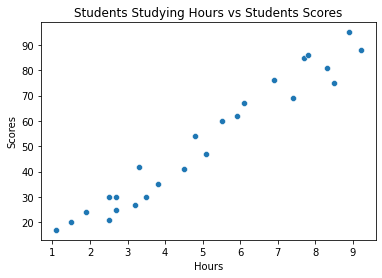

In [6]:
# import our helpful libraries uder aliases plt for pyplot, and sns for seaborn
import matplotlib.pyplot as plt
import seaborn as sns

# plotting scatter plot using seaborn and setting up our plot title
sns.scatterplot(x='Hours', y='Scores', data=student_scores)
plt.title('Students Studying Hours vs Students Scores')
plt.show()

So, we can see here from the value of R-correlation _which catching the linear relationships between 2 variables_ and from visuals that there is a strong linear relationship between the 2 variables and we can use Linear Regression to find the formula that best describe that relation.

### Data Modeling using Linear Regression
We will use a simple linear regression model to train on our dataset so can find the best fit model (formula).
We need first to split our data to training set and validation set, so we can measure our model performance on data unseen before, then we can training the model on our training data, finally measure our score.

In [7]:
# import our train_test_split function from sklearn.model_selection
from sklearn.model_selection import train_test_split

# Data Preparing
X = pd.DataFrame(student_scores.Hours)
y = pd.DataFrame(student_scores.Scores)

# split our dataset into training data and validation data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

# Model building
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()

# Model Training
regressor.fit(X_train, y_train)
print('Training Complete!')

Training Complete!


#### We can plot now our regression line which best fit our data.

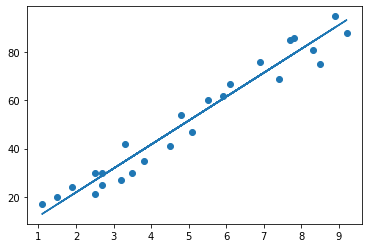

In [8]:
# Plotting the regression line
slope = regressor.coef_
y_intercept = regressor.intercept_
linear_equation = slope * X + y_intercept

# Plotting for the training & test data
plt.scatter(X, y)
plt.plot(X, linear_equation);
plt.show()

### Making Predictions
Now that we have trained our algorithm, it's time to make some predictions on our testing data.

In [9]:
# Model Predictions on validation set
preds = regressor.predict(X_test)
pd.DataFrame({'Predicted': [x for x in preds], 'Actual': [y for y in y_test.values]})

,Predicted,Actual
0,[16.84472176238379],[20]
1,[33.74557493951355],[27]
2,[75.50062396536356],[69]
3,[26.786400101871884],[30]
4,[60.58810645613141],[62]
5,[39.71058194320641],[35]
6,[20.821393098179026],[24]


### Model Evaluation
After we using our model for prediction, Let's validate our model with the 'mean absolute error' MAE metric to measure our model performance.

In [10]:
# Model performance measuring by using mean absolute error (MAE) metric
from sklearn.metrics import mean_absolute_error

print('MAE:', mean_absolute_error(y_test, preds))

MAE: 4.130879918502486


we can use our .score() method of model, it uses R-Squared metric as default.

In [11]:
print('R2:', regressor.score(X_test, y_test))

R2: 0.9367661043365055


### What will be predicted score if a student studies for 9.25 hrs/day?

In [12]:
print('Predicted score for student studies for 9.25 hrs/day = ', regressor.predict([[9.25]]))

Predicted score for student studies for 9.25 hrs/day =  [[93.89272889]]
